In [1]:
import sys
sys.path.append(r'C:\Study\SpeechAcquisitionModel')
import numpy as np
import pandas as pd
import torch
import os
from src.speech_classification.audio_processing import AudioPreprocessorFbank, SpeechCommandsDataCollector
from src.speech_classification.pytorch_conv_lstm import LstmNet, LstmNetEnsemble
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

wanted_words = ['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin',
                'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two',
                'up', 'wow', 'yes', 'zero']
wanted_words_tanh_transition = ['a_a', 'a_i', 'a_u', 'a_o',
                                'i_a', 'i_i', 'i_u', 'i_o',
                                'u_a', 'u_i', 'u_u', 'u_o',
                                'o_a', 'o_i', 'o_u', 'o_o' ]

wanted_words_combined = wanted_words_tanh_transition
model_settings = {
    'dct_coefficient_count': 26,
    'label_count': len(wanted_words_combined) + 2,
    'hidden_reccurent_cells_count': 64,
    'winlen': 0.04,
    'winstep': 0.04,
    'num_nets': 5
}
preproc = AudioPreprocessorFbank(model_settings['dct_coefficient_count'],
                                 winlen=model_settings['winlen'],
                                 winstep=model_settings['winstep'])

In [4]:
data_dir=r'C:\Study\Speech_command_classification\speech_dataset'
dataset_fname = r'C:\Study\SpeechAcquisitionModel\data\raw\Simple_transitions_s2s\07_04_2019_01_11_PM_31\07_04_2019_01_11_PM_31.pd'
df = pd.read_pickle(dataset_fname)

print(df.shape)

(4800, 5)


## Random sample

In [93]:
i = np.random.randint(0, df.shape[0])
sr = 22050
sample = df.iloc[i]
print(sample)
audio = sample['audio'].flatten()
# audio = np.int16(sample['audio'].flatten() * (2 ** 15 - 1))
audio_proc = preproc(audio,  sr)

y                                                        a_u
audio      [[-0.012374370224165829, -0.01307165354858851,...
states     [[0.25306912258391423, -4.28832887126474, -0.0...
actions    [[-0.008297485988780105, 0.003912226716603468,...
labels     [a, a, a, a, a, a, a, a, a, a, a, a, au, au, a...
Name: 805, dtype: object


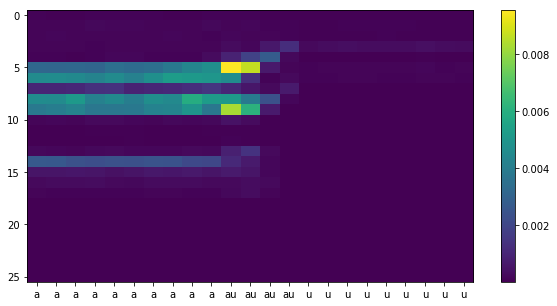

In [94]:
offset = 2
plt.figure(figsize=(10,5))
plt.imshow(audio_proc.T[:, offset:] ,aspect='auto')
plt.colorbar()
_ = plt.xticks(np.arange(0, audio_proc.shape[0] - offset), sample['labels'][offset:])
plt.show()

# plt.autoscale()